In [1]:
STOCK_TICKER = 'TSLA'
ndays = 14 # HIGHER NUMBER OF DAYS, Forecasting: aggregating and compounding issue, use less 1-10days.
start_date = '2018-01-01'

In [2]:
from imports import *
import ta_functions as ta

current_date = datetime.datetime.now().strftime('%Y-%m-%d')
stock_df = ta.get_stock_data(STOCK_TICKER, start_date, current_date)
stock_df = ta.add_technical_indicators(stock_df) 
stock_df = ta.add_candlestickpatterns(stock_df)

[*********************100%%**********************]  1 of 1 completed


In [3]:
# Model Training
X, y, scaler = ta.prepare_ml_data(stock_df)
    
X_train, X_test, y_train, y_test = ta.train_test_split(X, y, test_size=0.35, random_state=500)
model = ta.train_model(X_train, y_train, nest=1000, md=6)
#model = ta.train_booster(X_train, y_train, nest=10000, md=10)

ta.evaluate_model(model, X_test, y_test)
current_price = round(stock_df['Close'].iloc[-1], 2)  # Most recent closing price
print(f'Current price of {STOCK_TICKER}:' , current_price)

Root Mean Squared Error: 7.101
R^2 Score: 0.995
Current price of TSLA: 254.22


In [4]:
# Make predictions
predicted_prices = ta.predict_prices(model, stock_df, scaler, num_days=ndays, window_size=500)

signal = ta.generate_signal(predicted_prices, current_price, stock_df)
print(STOCK_TICKER + " is predicted as a ---- ", signal)

TSLA is predicted as a ----  HODL / SIDELINES


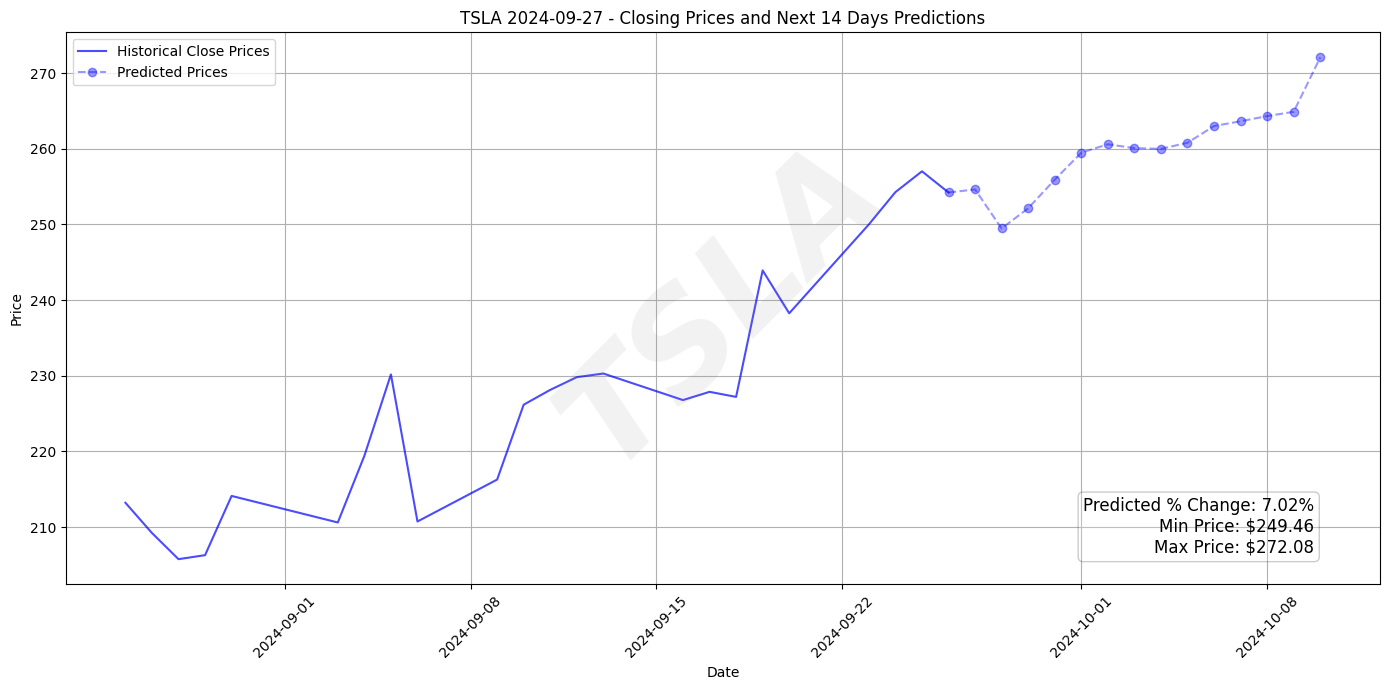

In [5]:
# PLOT PREDICTION
ta.plot_with_predictions(stock_df, predicted_prices, ticker = STOCK_TICKER, num_days=ndays)

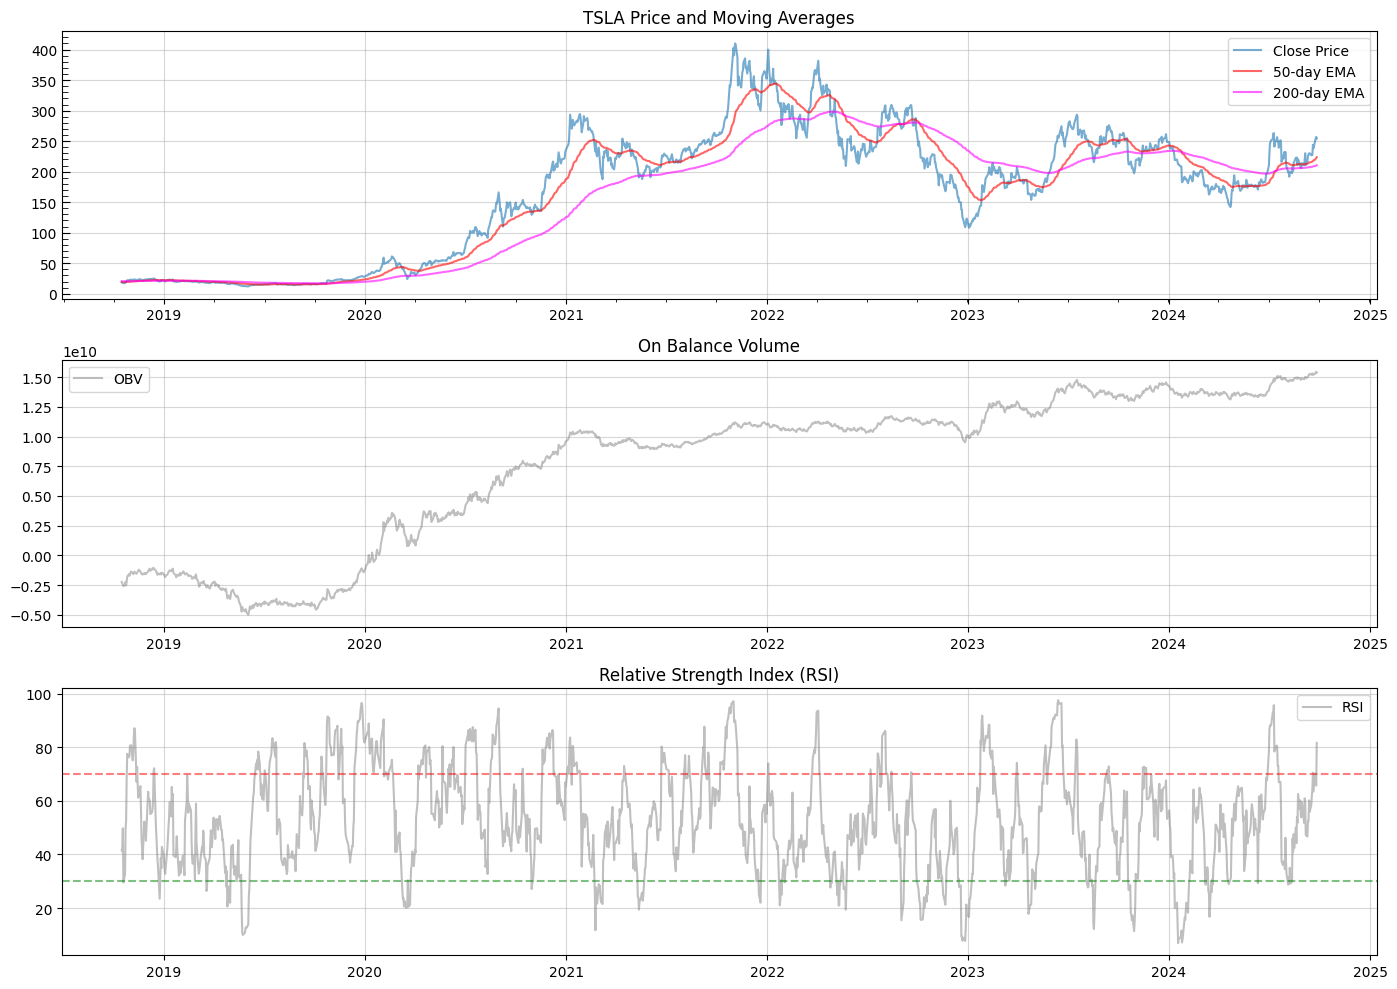

In [6]:
ta.plot_technical_indicators(stock_df, STOCK_TICKER )